In [1]:
import os
os.chdir("../../../")
os.getcwd()

'/Users/sbokupripeku/git/work/examples/costly_nonstationary_bandits'

In [2]:
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import pickle

In [3]:
with open('experiments/nursery/results/histograms.pickle', 'rb') as f:
    data = pickle.load(f)

In [4]:
all_stationarity_regions = data['all_stationarity_regions']

In [5]:
with open('experiments/nursery/results/policy_objects.pickle', 'rb') as f:
    policies = pickle.load(f)

In [6]:
algs_to_plot = ['Oracle', 'Algorithm1', 'SimOOS']

In [7]:
observation_histograms = {}
for policy_name in algs_to_plot:
    policy = policies[0][policy_name]

    policy_observation_histograms = []
    for region in all_stationarity_regions:
        observations_slice = policy.selected_context[slice(*region)]
        policy_observation_histograms.append(sum(observations_slice))
        
    observation_histograms[policy_name] = np.stack(policy_observation_histograms)

In [54]:
alg1 = policies[0]['Algorithm1']
oracle = policies[0]['Oracle']
simoos = policies[0]['SimOOS']

In [33]:
T = alg1.selected_context.shape[0]
CTX_SIZE = alg1.selected_context.shape[1]

In [72]:
all_change_points =  [r[0] for r in all_stationarity_regions] + [all_stationarity_regions[-1][-1]]

In [73]:
all_change_points

[1, 500, 1000, 2000, 3000, 3500, 5000, 6500, 7000, 8000, 9000, 10000]

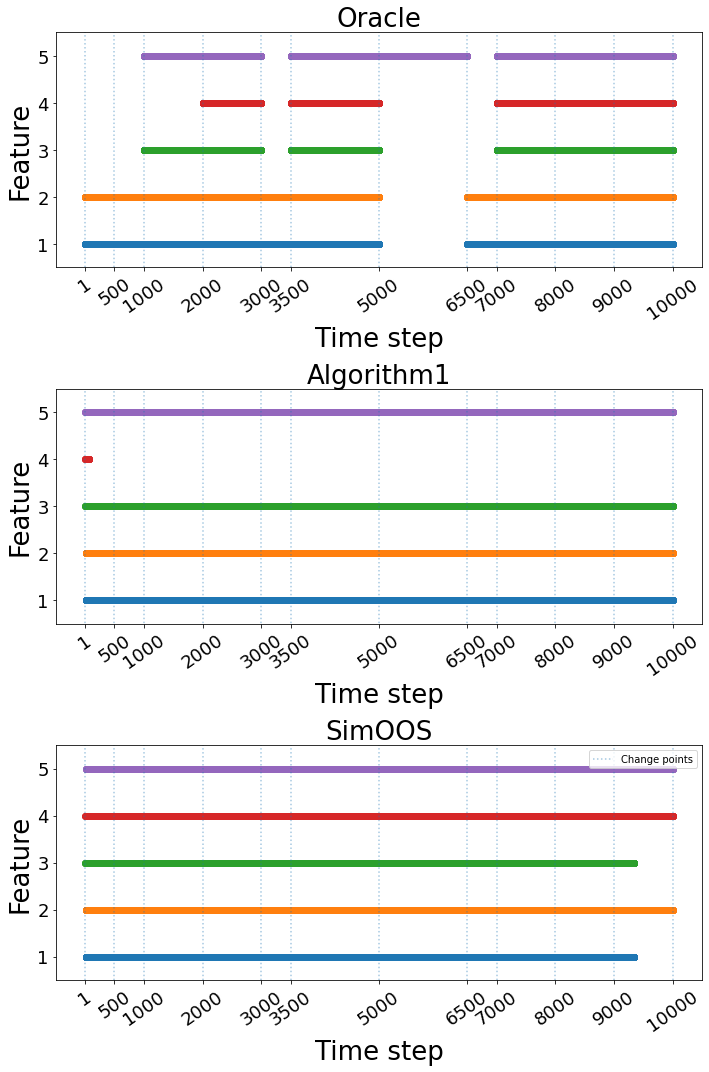

In [83]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

for i, alg_name in enumerate(algs_to_plot):
    policy = policies[0][alg_name]
    for f in range(CTX_SIZE):
        axs[i].scatter(list(range(T)), (f+1)* policy.selected_context[:, f])
    axs[i].set_ylim(1-0.5, CTX_SIZE+0.5)
    

    axs[i].vlines(
        all_change_points, ymin=0, ymax=5.5, linestyle=':', alpha=0.4, label='Change points'
    )

    axs[i].set_xlabel('Time step', fontsize=26)
    axs[i].set_ylabel('Feature', fontsize=26)


    axs[i].set_title(alg_name, fontsize=26)
    
    
    axs[i].set_xticks(ticks=all_change_points)
    axs[i].tick_params(axis='x', rotation=35)
    
    axs[i].tick_params(labelsize=18)
    
plt.tight_layout()
plt.legend()
plt.show()

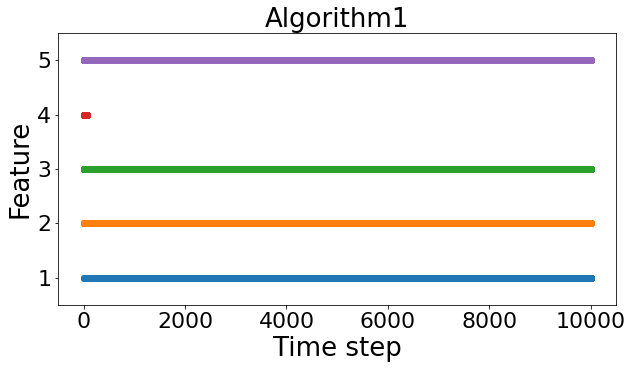

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for i in range(CTX_SIZE):
    ax.scatter(list(range(T)), (i+1)* alg1.selected_context[:, i])
ax.set_ylim(1-0.5, CTX_SIZE+0.5)

ax.set_xlabel('Time step', fontsize=26)
ax.set_ylabel('Feature', fontsize=26)


ax.set_title('Algorithm1', fontsize=26)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.show()

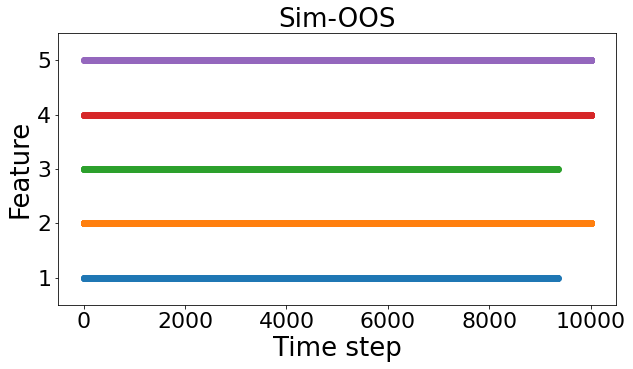

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for i in range(CTX_SIZE):
    ax.scatter(list(range(T)), (i+1)* simoos.selected_context[:, i])
ax.set_ylim(1-0.5, CTX_SIZE+0.5)

ax.set_xlabel('Time step', fontsize=26)
ax.set_ylabel('Feature', fontsize=26)


ax.set_title('Sim-OOS', fontsize=26)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.show()

In [8]:
N_STATIONARY_PERIODS = len(all_stationarity_regions)

In [9]:

colors = ['cyan', 'red', 'blue']

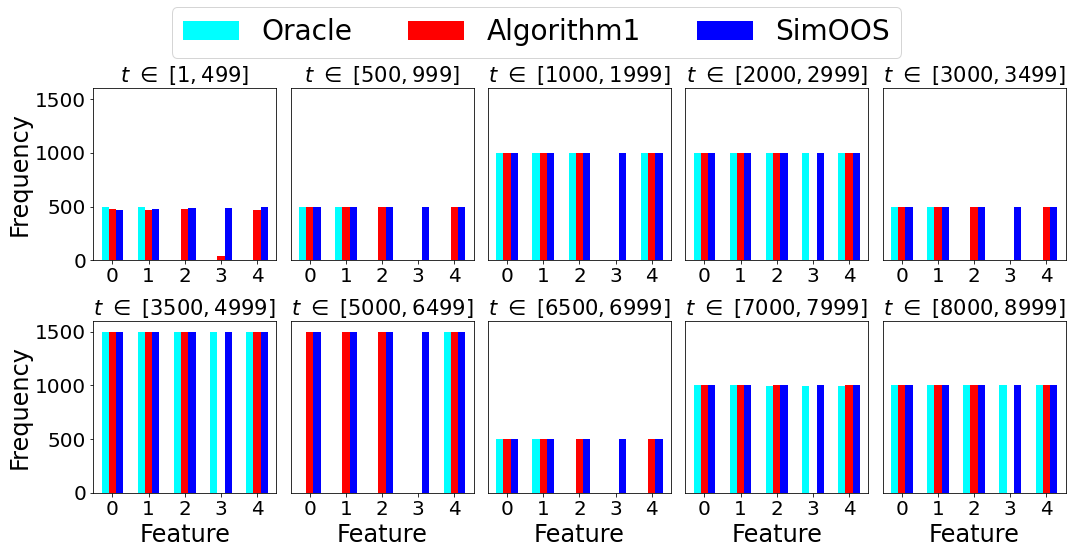

In [20]:
fig, axs = plt.subplots(2, math.floor(N_STATIONARY_PERIODS/2), figsize=(15, 7))

x = np.array([0, 1, 2, 3, 4])

handles = []
for period_num, ax in enumerate(axs.flatten()):
    if period_num >= N_STATIONARY_PERIODS:
        break
    for alg_num, alg_name in enumerate(algs_to_plot):
        
        bar = ax.bar(-0.2 + x+alg_num*0.2,
               observation_histograms[alg_name][period_num, :],
               width=0.2,
               color=colors[alg_num],
               label=alg_name,
        )
        period = all_stationarity_regions[period_num]
        ax.set_title(fr"$t\ \in \ [{period[0]}, {period[1]-1}]$", fontsize=21)
        if period_num == 0:
            handles.append(bar)
        ax.set_ylim(0, 1600)
        
        ax.tick_params(labelsize=20)
        ax.tick_params(labelsize=20)
    
    if period_num != 0 and period_num != math.floor(N_STATIONARY_PERIODS/2):
        # For all subplots apart from the leftmost ones
        ax.get_yaxis().set_visible(False)
    else:
        ax.set_ylabel('Frequency', fontsize=24)
        
    
    ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # Only integer labels
    
    
    if period_num >= math.floor(N_STATIONARY_PERIODS/2):
        # For all subplots in the lower row
        ax.set_xlabel("Feature", fontsize=24)
        



fig.legend(handles, algs_to_plot, loc="upper center",  bbox_to_anchor=(0.5, 1.12), ncol=3, prop={'size': 28})
plt.tight_layout()


plt.savefig('nursery_observation_histogram.pdf', bbox_inches='tight')
plt.show()